### create a notebook named model.ipynb.



### 1)run all your previous scripts that acquired, prepared, split, and scaled your data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#import our scripts that do data science workflow
import wrangle_telco
import split_scale_telco
import evaluate
import features_demo

In [2]:
df=wrangle_telco.wrangle_telco()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1685 non-null object
total_charges      1685 non-null float64
monthly_charges    1685 non-null float64
tenure             1685 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 65.8+ KB


In [3]:
train,test=split_scale_telco.split_my_data(df)

In [4]:
scaler, train_scaled, test_scaled=split_scale_telco.standard_scaler(train.drop(columns=['customer_id','total_charges']),test.drop(columns=['customer_id','total_charges']))

In [5]:
print(train_scaled)
print(test_scaled)

      monthly_charges    tenure
120         -0.349191  0.839851
1423        -1.184789 -1.700684
389          0.811120  0.839851
1137        -1.180459 -1.926509
1504        -1.036142  0.839851
438          0.646599  0.839851
571          1.102642 -0.232820
656          1.511060  0.726938
753          1.225311  0.839851
574          1.466321  0.839851
1215        -1.028926  0.839851
1053        -1.044801  0.501113
1131        -1.204993  0.726938
1253        -1.047687  0.839851
1031        -1.204993 -2.999179
772          1.490855 -0.006994
1402        -1.204993 -0.740926
516          0.461872  0.726938
1102        -1.047687  0.218831
1694        -1.199221 -0.628014
1086        -1.189119 -0.176363
1517        -1.040472  0.331744
133          0.336316  0.614025
1036        -1.193448  0.162375
72          -0.632053 -0.515101
551          0.513827  0.783394
1024        -1.053460 -0.289276
1432        -1.181903 -0.176363
895          0.669689  0.839851
1460        -1.106858 -0.853839
117     

In [6]:
X_train=train_scaled
y_train=train[['total_charges']]
X_test=test_scaled
y_test=test[['total_charges']]

### 2)select your features using your features script

In [7]:
features_demo.optimal_number_of_features(X_train,y_train)

(2, 0.9622743261396984)

In [8]:
features_demo.optimal_features(X_train,X_test,y_train,2)

(Index(['monthly_charges', 'tenure'], dtype='object'),
       monthly_charges    tenure
 0           -0.349191  0.839851
 1           -1.184789 -1.700684
 2            0.811120  0.839851
 3           -1.180459 -1.926509
 4           -1.036142  0.839851
 5            0.646599  0.839851
 6            1.102642 -0.232820
 7            1.511060  0.726938
 8            1.225311  0.839851
 9            1.466321  0.839851
 10          -1.028926  0.839851
 11          -1.044801  0.501113
 12          -1.204993  0.726938
 13          -1.047687  0.839851
 14          -1.204993 -2.999179
 15           1.490855 -0.006994
 16          -1.204993 -0.740926
 17           0.461872  0.726938
 18          -1.047687  0.218831
 19          -1.199221 -0.628014
 20          -1.189119 -0.176363
 21          -1.040472  0.331744
 22           0.336316  0.614025
 23          -1.193448  0.162375
 24          -0.632053 -0.515101
 25           0.513827  0.783394
 26          -1.053460 -0.289276
 27          -1.18190

### 3)fit 2 different linear models to your data

In [9]:
predictions=pd.DataFrame({'actual':y_train['total_charges']}).reset_index(drop=True)
#model 1
lm1=LinearRegression()
lm1.fit(X_train[['monthly_charges','tenure']],y_train)
lm1_predictions=lm1.predict(X_train[['monthly_charges','tenure']])
predictions['lm1']=lm1_predictions

#model 2
lm2=LinearRegression()
lm2.fit(X_train[['tenure']],y_train)
lm2_predictions=lm2.predict(X_train[['tenure']])
predictions['lm2']=lm2_predictions

#baseline model
predictions['baseline'] = y_train.mean()[0]
predictions.head()
#print(lm1.intercept_,lm1.coef_)

,actual,lm1,lm2,baseline
0,3580.95,3649.650709,5135.054403,3759.661944
1,538.20,-18.586557,974.514505,3759.661944
2,6376.55,6103.501534,5135.054403,3759.661944
3,478.75,-178.416924,604.688736,3759.661944
4,1797.10,2196.873354,5135.054403,3759.661944


### 4)evaluate the 2 models and your baseline.

In [10]:
MSE_baseline = mean_squared_error(predictions.actual, predictions.baseline)
SSE_baseline = MSE_baseline*len(predictions.actual)
RMSE_baseline = sqrt(MSE_baseline)
r2_baseline = r2_score(predictions.actual, predictions.baseline)
print(MSE_baseline,SSE_baseline,RMSE_baseline,r2_baseline)

6612927.089508685 8914225716.657707 2571.5612163642313 0.0


In [11]:
MSE_1 = mean_squared_error(predictions.actual, predictions.lm1)
SSE_1 = MSE_1*len(predictions.actual)
RMSE_1 = sqrt(MSE_1)
r2_1 = r2_score(predictions.actual, predictions.lm1)
print(MSE_1,SSE_1,RMSE_1,r2_1)

249477.130640758 336295172.10374177 499.47685696211994 0.9622743261396984


In [12]:
MSE_2 = mean_squared_error(predictions.actual, predictions.lm2)
SSE_2 = MSE_2*len(predictions.actual)
RMSE_2 = sqrt(MSE_2)
r2_2 = r2_score(predictions.actual, predictions.lm2)
print(MSE_2,SSE_2,RMSE_2,r2_2)

3930986.4171300903 5298969690.291362 1982.671535360835 0.40556029668517823


### 5)select the one that performed the best.
The model with monthly charges and tenure performed the best

### 6)apply to your test data

In [13]:
model=lm1.predict(X_test[['monthly_charges','tenure']])
model=model.ravel().reshape(337)
y_test1=np.array(y_test).ravel().reshape(337)
best_model=pd.DataFrame({'predictions':model,'total_charges':y_test1})

best_model.head()

,predictions,total_charges
0,6119.243915,6325.25
1,4166.894053,4069.90
2,7669.204860,8405.00
3,-61.315302,520.55
4,5530.197634,5705.05


### 7)Write a function that creates the model object, fits and predicts,   given X_train, X_test, y_train, y_test

In [28]:
X_train1=X_train[['monthly_charges','tenure']]
X_test1=X_test[['monthly_charges','tenure']]
def modeling_function(X_train,X_test,y_train,y_test):
    predictions_train=pd.DataFrame({'actual':y_train['total_charges']}).reset_index(drop=True)
    print(predictions_train)
    predictions_test=pd.DataFrame({'actual':y_test.total_charges}).reset_index(drop=True)
    #model 1
    lm1=LinearRegression()
    lm1.fit(X_train,y_train)
    lm1_predictions=lm1.predict(X_train)
    predictions_train['lm1']=lm1_predictions

    #model 2
    lm2=LinearRegression()
    lm2.fit(X_test,y_test)
    lm2_predictions=lm2.predict(X_test)
    predictions_test['lm2']=lm2_predictions
    
    return predictions_train,predictions_test

In [29]:
model_train,model_test=modeling_function(X_train1,X_test1,y_train,y_test)

       actual
0     3580.95
1      538.20
2     6376.55
3      478.75
4     1797.10
5     6096.90
6     5424.25
7     7939.25
8     7346.20
9     7965.95
10    1887.00
11    1697.70
12    1462.05
13    1849.20
14      68.80
15    6465.00
16     819.95
17    5498.20
18    1498.35
19     856.50
20    1079.45
21    1573.05
22    4953.25
23    1258.15
24    1978.65
25    5564.85
26    1229.10
27    1092.35
28    6130.85
29    1014.25
30    6786.10
31    1416.75
32    1036.00
33    6045.90
34    1468.90
35    1035.50
36     937.10
37    4513.65
38    6302.85
39    1414.65
40    7099.00
41    1759.40
42    7028.50
43    3166.90
44    5878.90
45    3571.60
46    7839.85
47    1888.25
48    1319.95
49    6910.30
50    1263.85
51    3886.85
52     949.80
53     153.30
54    4464.80
55     903.70
56    1663.50
57    5553.25
58    3423.50
59     917.45
60    4089.45
61    6876.05
62    3119.90
63    6520.80
64    4872.35
65    8317.95
66    1376.50
67    1051.90
68    1510.50
69    7998.80
70    

In [16]:
print(model_test.head())
print(model_train.head())

    actual          lm2
0  6325.25  6102.505588
1  4069.90  4138.818225
2  8405.00  7662.408456
3   520.55   -53.632012
4  5705.05  5509.072488
    actual          lm1
0  3580.95  3649.650709
1   538.20   -18.586557
2  6376.55  6103.501534
3   478.75  -178.416924
4  1797.10  2196.873354


### 8)Write a function, plot_residuals(x, y, dataframe) that takes the feature, the target, and the dataframe as input and returns a residual plot.

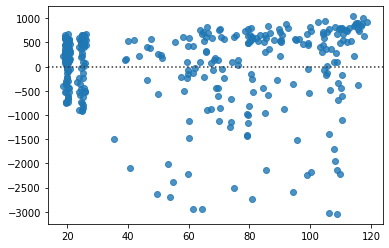

In [17]:
def plot_residuals(x, y):
    '''
    Plots the residuals of a model that uses x to predict y. Note that we don't
    need to make any predictions ourselves here, seaborn will create the model
    and predictions for us under the hood with the `residplot` function.
    '''
    return sns.residplot(x, y)

x=test[['monthly_charges']]
y=test[['total_charges']]
plot_residuals(x,y)

### 9)Write a function, plot_regression(x, y) that takes a feature and a target and returns the datapoints, the regression line, and the confidence interval.

In [18]:
res = sm.OLS(y, x).fit()

In [19]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          total_charges   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              8512.
Date:                Sun, 20 Oct 2019   Prob (F-statistic):                   1.01e-240
Time:                        15:14:19   Log-Likelihood:                         -2756.1
No. Observations:                 337   AIC:                                      5514.
Df Residuals:                     336   BIC:                                      5518.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
monthly_charges    63.1749      0.685     92.259      0.000      61.828      64.522
==============================================================================
Omnibus:                       62.586   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.685
Skew:                          -1.113   Prob(JB):                     3.72e-22
Kurtosis:                       4.440   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

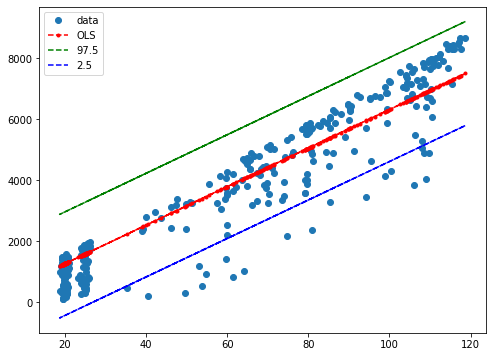

In [20]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
#ax.plot(x, y, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'g--',label='97.5')
ax.plot(x, iv_l, 'b--',label='2.5')
ax.legend(loc='best');

In [21]:
def plot_regression(x,y):
    res = sm.OLS(y, x).fit()
    prstd, iv_l, iv_u = wls_prediction_std(res)

    fig, ax = plt.subplots(figsize=(8,6))

    ax.plot(x, y, 'o', label="data")
    #ax.plot(x, y, 'b-', label="True")
    ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
    ax.plot(x, iv_u, 'g--',label='97.5% Confidence Level')
    ax.plot(x, iv_l, 'b--',label='2.5% Confidence Level')
    ax.legend(loc='best');
    plt.show()
    

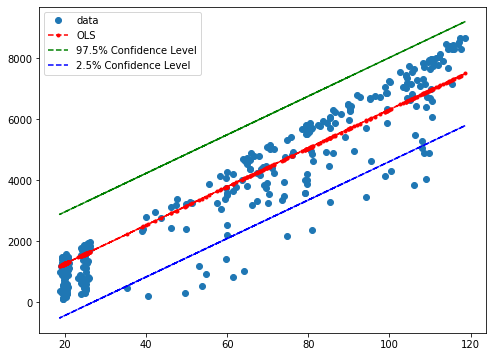

In [22]:
plot_regression(x,y)